In [ ]:
#This is the real Code for Handwriting Analysis
import cv2
import numpy as np
import math

# Global variables for features
features = {
    'baseline_angle': 0.0,
    'top_margin': 0.0,
    'letter_size': 0.0,
    'line_spacing': 0.0,
    'word_spacing': 0.0,
    'pen_pressure': 0.0,
    'slant_angle': 0.0
}

def load_image(image_path):
    """Load and validate image"""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    return img

def preprocess_image(img):
    """Basic image preprocessing"""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY_INV)
    return thresh

def analyze_handwriting(image_path):
    """Main function to analyze handwriting features"""
    print("\n=== Handwriting Analysis Report ===")
    
    # Load and validate image
    img = load_image(image_path)
    if img is None:
        return
    
    # Preprocess image
    processed = preprocess_image(img)
    
    # Extract basic features (simplified versions)
    features['letter_size'] = estimate_letter_size(processed)
    features['line_spacing'] = estimate_line_spacing(processed)
    features['word_spacing'] = estimate_word_spacing(processed)
    features['slant_angle'] = estimate_slant_angle(processed)
    features['pen_pressure'] = estimate_pen_pressure(img)
    
    # Display results
    print("\nKey Features:")
    for feature, value in features.items():
        print(f"{feature.replace('_', ' ').title():<15}: {value:.2f}")
    
    print("\n=== Analysis Complete ===\n")

def estimate_letter_size(img):
    """Simplified letter size estimation"""
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    heights = [cv2.boundingRect(ctr)[3] for ctr in contours if cv2.boundingRect(ctr)[3] > 10]
    return np.mean(heights) if heights else 0

def estimate_line_spacing(img):
    """Simplified line spacing estimation"""
    horizontal_proj = np.sum(img, axis=1)
    lines = np.where(horizontal_proj > np.mean(horizontal_proj))[0]
    spacing = np.mean(np.diff(lines)) if len(lines) > 1 else 0
    return spacing / features['letter_size'] if features['letter_size'] else 0

def estimate_word_spacing(img):
    """Simplified word spacing estimation"""
    vertical_proj = np.sum(img, axis=0)
    words = np.where(vertical_proj > np.mean(vertical_proj))[0]
    spacing = np.mean(np.diff(words)) if len(words) > 1 else 0
    return spacing / features['letter_size'] if features['letter_size'] else 0

def estimate_slant_angle(img):
    """Simplified slant angle estimation"""
    edges = cv2.Canny(img, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)
    
    if lines is None:
        return 0.0
    
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        if abs(angle) < 45:  # Filter out nearly horizontal lines
            angles.append(angle)
    
    return np.mean(angles) if angles else 0.0

def estimate_pen_pressure(img):
    """Simplified pen pressure estimation"""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inverted = 255 - gray
    non_zero = inverted[inverted > 50]
    return np.mean(non_zero) if non_zero.size > 0 else 0

if __name__ == "__main__":
    # Example usage
    image_path = r"D:\\Chetan\\Msc 1\\Yash.jpeg"  # Replace with your image path
    analyze_handwriting(image_path)


=== Handwriting Analysis Report ===

Key Features:
Baseline Angle : 0.00
Top Margin     : 0.00
Letter Size    : 21.81
Line Spacing   : 0.12
Word Spacing   : 0.45
Pen Pressure   : 99.12
Slant Angle    : 0.47

=== Analysis Complete ===



In [5]:
import cv2
import numpy as np
import math

# Global variables for features
features = {
    'baseline_angle': {'value': 0.0, 'interpretation': ''},
    'top_margin': {'value': 0.0, 'interpretation': ''},
    'letter_size': {'value': 0.0, 'interpretation': ''},
    'line_spacing': {'value': 0.0, 'interpretation': ''},
    'word_spacing': {'value': 0.0, 'interpretation': ''},
    'pen_pressure': {'value': 0.0, 'interpretation': ''},
    'slant_angle': {'value': 0.0, 'interpretation': ''}
}

def load_image(image_path):
    """Load and validate image"""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    return img

def preprocess_image(img):
    """Basic image preprocessing"""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY_INV)
    return thresh

def interpret_features():
    """Generate graphological interpretations for all features"""
    # Baseline Angle interpretation
    angle = features['baseline_angle']['value']
    if angle == 0:
        features['baseline_angle']['interpretation'] = "Perfectly straight - Emotionally stable, reliable, and consistent"
    elif angle > 0:
        features['baseline_angle']['interpretation'] = f"Rising ({angle:.1f}°) - Optimistic and energetic"
    else:
        features['baseline_angle']['interpretation'] = f"Descending ({angle:.1f}°) - Possibly pessimistic or tired"

    # Top Margin interpretation
    margin = features['top_margin']['value']
    if margin == 0:
        features['top_margin']['interpretation'] = "No margin - Practical, efficient use of space"
    elif margin < 0.5:
        features['top_margin']['interpretation'] = "Small margin - Balanced approach"
    else:
        features['top_margin']['interpretation'] = "Large margin - Respect for conventions, may be reserved"

    # Letter Size interpretation
    size = features['letter_size']['value']
    if size < 15:
        features['letter_size']['interpretation'] = "Small - Detail-oriented, focused"
    elif size < 25:
        features['letter_size']['interpretation'] = "Medium - Balanced perspective"
    else:
        features['letter_size']['interpretation'] = "Large - Outgoing, needs space"

    # Line Spacing interpretation
    spacing = features['line_spacing']['value']
    if spacing < 0.2:
        features['line_spacing']['interpretation'] = "Tight - May overload self, crowded thoughts"
    elif spacing < 0.5:
        features['line_spacing']['interpretation'] = "Moderate - Good organization"
    else:
        features['line_spacing']['interpretation'] = "Wide - Clear thinking, may isolate"

    # Word Spacing interpretation
    word_space = features['word_spacing']['value']
    if word_space < 0.3:
        features['word_spacing']['interpretation'] = "Narrow - Comfortable with closeness"
    elif word_space < 0.7:
        features['word_spacing']['interpretation'] = "Moderate - Balanced social needs"
    else:
        features['word_spacing']['interpretation'] = "Wide - Needs personal space"

    # Pen Pressure interpretation
    pressure = features['pen_pressure']['value']
    if pressure < 50:
        features['pen_pressure']['interpretation'] = "Light - Sensitive, possibly delicate"
    elif pressure < 100:
        features['pen_pressure']['interpretation'] = "Moderate - Balanced energy"
    else:
        features['pen_pressure']['interpretation'] = "Heavy - Strong vitality, intense"

    # Slant Angle interpretation
    slant = features['slant_angle']['value']
    if slant < -5:
        features['slant_angle']['interpretation'] = "Left slant - Reserved, independent"
    elif slant < 5:
        features['slant_angle']['interpretation'] = "Vertical - Logical, controlled"
    else:
        features['slant_angle']['interpretation'] = "Right slant - Emotional, outgoing"

def estimate_letter_size(img):
    """Simplified letter size estimation"""
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    heights = [cv2.boundingRect(ctr)[3] for ctr in contours if cv2.boundingRect(ctr)[3] > 10]
    return np.mean(heights) if heights else 0

def estimate_line_spacing(img):
    """Simplified line spacing estimation"""
    horizontal_proj = np.sum(img, axis=1)
    lines = np.where(horizontal_proj > np.mean(horizontal_proj))[0]
    spacing = np.mean(np.diff(lines)) if len(lines) > 1 else 0
    letter_size = features['letter_size']['value']
    return spacing / letter_size if letter_size else 0

def estimate_word_spacing(img):
    """Simplified word spacing estimation"""
    vertical_proj = np.sum(img, axis=0)
    words = np.where(vertical_proj > np.mean(vertical_proj))[0]
    spacing = np.mean(np.diff(words)) if len(words) > 1 else 0
    letter_size = features['letter_size']['value']
    return spacing / letter_size if letter_size else 0

def estimate_slant_angle(img):
    """Simplified slant angle estimation"""
    edges = cv2.Canny(img, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)
    
    if lines is None:
        return 0.0
    
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        if abs(angle) < 45:  # Filter out nearly horizontal lines
            angles.append(angle)
    
    return np.mean(angles) if angles else 0.0

def estimate_pen_pressure(img):
    """Simplified pen pressure estimation"""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inverted = 255 - gray
    non_zero = inverted[inverted > 50]
    return np.mean(non_zero) if non_zero.size > 0 else 0

def analyze_handwriting(image_path):
    """Main function to analyze handwriting features"""
    print("\n=== Handwriting Analysis Report ===")
    
    # Load and validate image
    img = load_image(image_path)
    if img is None:
        return
    
    # Preprocess image
    processed = preprocess_image(img)
    
    # Extract basic features (letter_size first since others depend on it)
    features['letter_size']['value'] = estimate_letter_size(processed)
    features['line_spacing']['value'] = estimate_line_spacing(processed)
    features['word_spacing']['value'] = estimate_word_spacing(processed)
    features['slant_angle']['value'] = estimate_slant_angle(processed)
    features['pen_pressure']['value'] = estimate_pen_pressure(img)
    
    # Generate interpretations
    interpret_features()
    
    # Display results
    print("\nNumerical Features:")
    for feature, data in features.items():
        print(f"{feature.replace('_', ' ').title():<15}: {data['value']:.2f}")
    
    print("\nGraphological Interpretations:")
    for feature, data in features.items():
        print(f"\n{feature.replace('_', ' ').title():<15}")
        print(f"  Value: {data['value']:.2f}")
        print(f"  Meaning: {data['interpretation']}")
    
    print("\n=== Analysis Complete ===\n")

if __name__ == "__main__":
    image_path = r"D:\\Chetan\\Msc 1\\Swaraj.jpeg"  # Replace with your image path
    analyze_handwriting(image_path)


=== Handwriting Analysis Report ===

Numerical Features:
Baseline Angle : 0.00
Top Margin     : 0.00
Letter Size    : 19.24
Line Spacing   : 0.12
Word Spacing   : 0.12
Pen Pressure   : 139.27
Slant Angle    : -0.33

Graphological Interpretations:

Baseline Angle 
  Value: 0.00
  Meaning: Perfectly straight - Emotionally stable, reliable, and consistent

Top Margin     
  Value: 0.00
  Meaning: No margin - Practical, efficient use of space

Letter Size    
  Value: 19.24
  Meaning: Medium - Balanced perspective

Line Spacing   
  Value: 0.12
  Meaning: Tight - May overload self, crowded thoughts

Word Spacing   
  Value: 0.12
  Meaning: Narrow - Comfortable with closeness

Pen Pressure   
  Value: 139.27
  Meaning: Heavy - Strong vitality, intense

Slant Angle    
  Value: -0.33
  Meaning: Vertical - Logical, controlled

=== Analysis Complete ===



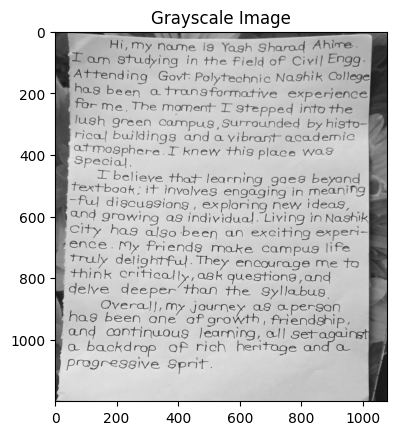

In [3]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:\\Chetan\\Msc 1\\Yash.jpeg" # Update with your path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Check the file path.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Display grayscale image
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.show()

In [ ]:
import cv2
print(cv2.__version__)

4.11.0


In [8]:
import pickle
from sklearn.svm import SVC  # Import SVM model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Sample dataset (replace with your own handwriting features and labels)
data = load_iris()
X, y = data.data, data.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM model
model = SVC(kernel='linear')  # You can change the kernel if needed (e.g., 'rbf', 'poly')
model.fit(X_train, y_train)

# Save the trained SVM model to 'model.pkl'
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ SVM model saved successfully as 'model.pkl'!")


✅ SVM model saved successfully as 'model.pkl'!


In [9]:
import pickle

# Load the trained SVM model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

print("🎯 Model loaded successfully!")


🎯 Model loaded successfully!


In [10]:
import pickle
from sklearn.svm import SVC  # Import SVM model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Sample dataset (replace with your own handwriting features and labels)
data = load_iris()
X, y = data.data, data.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM model
model = SVC(kernel='linear')  # You can change the kernel if needed (e.g., 'rbf', 'poly')
model.fit(X_train, y_train)

# Save the trained SVM model to 'model.pkl'
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ SVM model saved successfully as 'model.pkl'!")


✅ SVM model saved successfully as 'model.pkl'!
